# **'Ove' Gloves**

In [ ]:
# Importing reguired packages.
import pandas as pd
import nltk
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import log_loss
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA
import plotly.express as px
import tensorflow as tf
from imblearn.metrics import geometric_mean_score
import numpy as np
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import f1_score
from numpy import arange
from sklearn.feature_selection import SelectKBest, chi2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import cohen_kappa_score
from nltk import agreement

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Reading the dataset.
ove = pd.read_csv('Ove_label.csv')
ove.head()

,review_date,handle,rating,helpfulness_rating,Amer label,Olga label,Jason label,Justin label,Final label,review
0,24-Mar-23,Lynette51,5,NaN,0,0,0,0,0,Great product
1,23-Mar-23,J. Young,5,NaN,0,0,0,0,0,Replaced an older pair with the new ones after...
2,22-Mar-23,Denise Lynn Wells,5,NaN,0,0,0,0,0,The gloves have more flexibility than mitts or...
3,20-Mar-23,J J,5,NaN,0,0,0,0,0,I bought these to replace worn-out greasy glov...
4,18-Mar-23,Mrs. B,5,NaN,0,0,0,0,0,These are so great- they protect you from the ...


In [ ]:
ove.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_date         851 non-null    object
 1   handle              850 non-null    object
 2   rating              851 non-null    int64 
 3   helpfulness_rating  90 non-null     object
 4   Amer label          851 non-null    int64 
 5   Olga label          851 non-null    int64 
 6   Jason label         851 non-null    int64 
 7   Justin label        851 non-null    int64 
 8   Final label         851 non-null    int64 
 9   review              851 non-null    object
dtypes: int64(6), object(4)
memory usage: 66.6+ KB


In [ ]:
ove.shape

(851, 10)

The dataset has 851 rows and 10 columns. Each row represents a review for a given product.

In [ ]:
# Counting all values in "Final Label" column.
print(ove['Final label'].value_counts())

0    803
1     48
Name: Final label, dtype: int64


In [ ]:
# Calculating persantage of values in the 'Final label' column.
print(ove['Final label'].value_counts(normalize = True).mul(100).round(2))

0    94.36
1     5.64
Name: Final label, dtype: float64


The 'Final label' column has values 0, 1. They represent:
- Not counterfeit product as 0,
- Counterfeit product as 1,

The dataset has:
- Not counterfeit product reviews: 803 (94.36%)
- Counterfeit product reviews: 48 (5.64%)

In [ ]:
# Computing the Cohen's Kappa score.
rater1 = ove['Amer label']
rater2 = ove['Olga label']
rater3 = ove['Jason label']
rater3 = ove['Justin label']
taskdata = [[0,str(i),str(rater1[i])] for i in range(0,len(rater1))]+[[1,str(i),str(rater2[i])] for i in range(0,len(rater2))]+[[2,str(i),str(rater3[i])] for i in range(0,len(rater3))]
ratingtask = agreement.AnnotationTask(data = taskdata)

print("kappa " +str(ratingtask.kappa()))
print("fleiss " + str(ratingtask.multi_kappa()))
print("alpha " +str(ratingtask.alpha()))
print("scotts " + str(ratingtask.pi()))

kappa 0.9927320864292427
fleiss 0.9927326450268575
alpha 0.9927354709418837
scotts 0.9927326243395882


In [ ]:
# Dropping columns that are not useful.
ove.drop(columns = ['review_date','handle','helpfulness_rating', 'Amer label', 'Olga label', 'Jason label', 'Justin label'], inplace = True)
ove.head()

,rating,Final label,review
0,5,0,Great product
1,5,0,Replaced an older pair with the new ones after...
2,5,0,The gloves have more flexibility than mitts or...
3,5,0,I bought these to replace worn-out greasy glov...
4,5,0,These are so great- they protect you from the ...


In [ ]:
# 1. Pre-process data as appropriate (10 pts.)
# Printing stopwords.
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Creating a function for preprocessing reviews.
def review_preprocess(t):
    # Converting all words to lower case.
    clean_r = t.lower()
    # Removing punctuations.
    clean_r = [char for char in clean_r if char not in string.punctuation]
    clean_r = ''.join(clean_r)
    # Removing numbers.
    clean_r = re.sub("\d", "", clean_r)
    # Removing stopwords.
    clean_r = [word for word in clean_r.split() if word not in stopwords.words('english')]
    clean_r = ' '.join(clean_r)
    return clean_r

In [ ]:
# Applying the function to the column in DataFrame.
ove['review'] = ove['review'].apply(review_preprocess)
ove.head()

,rating,Final label,review
0,5,0,great product
1,5,0,replaced older pair new ones many years didn’t...
2,5,0,gloves flexibility mitts flat potholders
3,5,0,bought replace wornout greasy gloves last cent...
4,5,0,great protect heat right oven doesnt seem like...


In [ ]:
# Vectorizing the corpus using TFIDF.
stemmer = SnowballStemmer("english")
def tokenize_and_stem(text):
    # First tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # Filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
# Splitting dataset into training and testing.
X_o = ove['review']
y_o = ove['Final label']

X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size = 0.33, random_state = 101)

In [ ]:
# 2. Build Naive Bayes and a sequential model with sentence embedding (300 dimensions) (10 pts.)
# 3. Assess model performance, pick one metric to compare model performance and explain your metric choice. (10 pts.)
# G-means.
# Listing the models that will be built.
names = ["Naive Bayes", "Logistic Regression", "Decision Tree", "Boosted Tree", "Random Forest", "SVM"]

# Defining the corresponding list of classifiers, setting parameters for each model.
classifiers = [MultinomialNB(),
               LogisticRegression(),
               DecisionTreeClassifier(max_depth = 5),
               AdaBoostClassifier(),
               RandomForestClassifier(max_depth = 5, n_estimators = 10),
               SVC(probability = True),
               ]

# Creating a dictionary to store the optimal thresholds for each model.
thresholds = {}

# Fitting each classifier to the training set, making predictions on the test set,
# evaluating performance, and finding the optimal threshold for each model.
for name, clf in zip(names, classifiers):
    clf_pipe = Pipeline([
        ('tfidf', TfidfVectorizer(max_df = 0.9, max_features = 5000,
                                  min_df = 0.1,
                                  use_idf = True, tokenizer = tokenize_and_stem, ngram_range = (1, 3))),
        (name, clf)
    ])

    clf_pipe.fit(X_train_o, y_train_o)

    pred_prob = clf_pipe.predict_proba(X_test_o)[:, 1]
    fpr, tpr, thresholds_ = roc_curve(y_test_o, pred_prob)

    # Computing the G-mean for each threshold.
    g_mean = []
    for thresh in thresholds_:
        pred = (pred_prob >= thresh).astype(int)
        g_mean.append(geometric_mean_score(y_test_o, pred))

    # Choosing the threshold that maximizes the G-mean.
    optimal_idx = np.argmax(g_mean)
    optimal_threshold = thresholds_[optimal_idx]

    # Storing the optimal threshold in the dictionary.
    thresholds[name] = optimal_threshold

    # Making predictions using the optimal threshold.
    pred = (pred_prob >= optimal_threshold).astype(int)

    roc_auc = roc_auc_score(y_test_o, pred_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_test_o, pred)
    log_loss_val = log_loss(y_test_o, pred_prob)
    g_mean_val = geometric_mean_score(y_test_o, pred)

    target_names = ['Not counterfeit product', 'Counterfeit product']

    print('\n\n', name, '\n\n')
    print(classification_report(y_test_o, pred, target_names = target_names))
    print('ROC AUC: ', round(roc_auc, 2))
    print('Precision/Recall AUC: ', round(auc(precision, recall), 2))
    print('Optimal threshold: ', round(optimal_threshold, 2))
    print('Log loss: ', round(log_loss_val, 2))
    print('G-mean: ', round(g_mean_val, 2))

    print('\n\n')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 Naive Bayes 


                         precision    recall  f1-score   support

Not counterfeit product       0.99      0.81      0.89       262
    Counterfeit product       0.24      0.84      0.37        19

               accuracy                           0.81       281
              macro avg       0.61      0.82      0.63       281
           weighted avg       0.94      0.81      0.85       281

ROC AUC:  0.88
Precision/Recall AUC:  0.48
Optimal threshold:  0.06
Log loss:  0.2
G-mean:  0.82





/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 Logistic Regression 


                         precision    recall  f1-score   support

Not counterfeit product       0.98      0.85      0.91       262
    Counterfeit product       0.27      0.79      0.41        19

               accuracy                           0.84       281
              macro avg       0.63      0.82      0.66       281
           weighted avg       0.93      0.84      0.88       281

ROC AUC:  0.89
Precision/Recall AUC:  0.47
Optimal threshold:  0.08
Log loss:  0.18
G-mean:  0.82





/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 Decision Tree 


                         precision    recall  f1-score   support

Not counterfeit product       0.95      0.85      0.90       262
    Counterfeit product       0.17      0.42      0.24        19

               accuracy                           0.82       281
              macro avg       0.56      0.63      0.57       281
           weighted avg       0.90      0.82      0.85       281

ROC AUC:  0.58
Precision/Recall AUC:  0.25
Optimal threshold:  0.05
Log loss:  1.48
G-mean:  0.6





/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 Boosted Tree 


                         precision    recall  f1-score   support

Not counterfeit product       0.98      0.71      0.82       262
    Counterfeit product       0.16      0.79      0.27        19

               accuracy                           0.72       281
              macro avg       0.57      0.75      0.55       281
           weighted avg       0.92      0.72      0.79       281

ROC AUC:  0.8
Precision/Recall AUC:  0.42
Optimal threshold:  0.4
Log loss:  0.44
G-mean:  0.75





/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 Random Forest 


                         precision    recall  f1-score   support

Not counterfeit product       0.97      0.84      0.90       262
    Counterfeit product       0.24      0.68      0.36        19

               accuracy                           0.83       281
              macro avg       0.61      0.76      0.63       281
           weighted avg       0.92      0.83      0.87       281

ROC AUC:  0.79
Precision/Recall AUC:  0.41
Optimal threshold:  0.04
Log loss:  0.21
G-mean:  0.76





/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 SVM 


                         precision    recall  f1-score   support

Not counterfeit product       0.99      0.64      0.77       262
    Counterfeit product       0.15      0.89      0.26        19

               accuracy                           0.65       281
              macro avg       0.57      0.77      0.52       281
           weighted avg       0.93      0.65      0.74       281

ROC AUC:  0.82
Precision/Recall AUC:  0.46
Optimal threshold:  0.05
Log loss:  0.21
G-mean:  0.76





In [ ]:
# Builsequential model with sentence embedding (300 dimensions).
# Pre-processing reviews for modeling.
vocab_size = 5000
embedding_dim = 300
max_length = 500
trunc_type ='post'
oov_tok = "<OOV>"

# Tokenization
tokenizer_ove = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer_ove.fit_on_texts(X_train_o)

word_index = tokenizer_ove.word_index
sequences_ove = tokenizer_ove.texts_to_sequences(X_train_o)
testing_sequences_ove = tokenizer_ove.texts_to_sequences(X_test_o)

# Padding
padded_ove = pad_sequences(sequences_ove, maxlen = max_length, truncating = trunc_type)
testing_padded_ove = pad_sequences(testing_sequences_ove, maxlen = max_length)

In [ ]:
# Developing a 2-layer (100, 100) fully-connected neural network model using review length 500 and 300-dimension.
# Using activation ='sigmoid', loss ='binary_crossentropy'
model_500_300_ove = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])
model_500_300_ove.compile(loss ='binary_crossentropy', optimizer ='adam', metrics = [tf.keras.metrics.AUC(name = 'roc_auc')])
model_500_300_ove.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 500, 300)          1500000   
                                                                 
 flatten_11 (Flatten)        (None, 150000)            0         
                                                                 
 dense_33 (Dense)            (None, 100)               15000100  
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 1)                 101       
                                                                 
Total params: 16,510,301
Trainable params: 16,510,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 5)

In [ ]:
# Training the model.
num_epochs = 100
history = model_500_300_ove.fit(padded_ove, y_train_o, epochs = num_epochs,
                                validation_data = (testing_padded_ove, y_test_o), callbacks = [early_stop])

Epoch 1/100
18/18 [==============================] - 3s 109ms/step - loss: 0.2608 - roc_auc: 0.5741 - val_loss: 0.2232 - val_roc_auc: 0.8453
Epoch 2/100
18/18 [==============================] - 1s 72ms/step - loss: 0.1309 - roc_auc: 0.8616 - val_loss: 0.1494 - val_roc_auc: 0.9049
Epoch 3/100
18/18 [==============================] - 1s 72ms/step - loss: 0.0677 - roc_auc: 0.9629 - val_loss: 0.1148 - val_roc_auc: 0.9475
Epoch 4/100
18/18 [==============================] - 1s 72ms/step - loss: 0.0288 - roc_auc: 0.9874 - val_loss: 0.1392 - val_roc_auc: 0.9555
Epoch 5/100
18/18 [==============================] - 1s 76ms/step - loss: 0.0191 - roc_auc: 0.9910 - val_loss: 0.1241 - val_roc_auc: 0.9582
Epoch 6/100
18/18 [==============================] - 1s 70ms/step - loss: 0.0106 - roc_auc: 1.0000 - val_loss: 0.1390 - val_roc_auc: 0.9622
Epoch 7/100
18/18 [==============================] - 1s 71ms/step - loss: 0.0138 - roc_auc: 0.9984 - val_loss: 0.3509 - val_roc_auc: 0.7632
Epoch 8/100
18/18 [

In [ ]:
# Finding optimal threshold and evaluating the model.
y_pred_proba_o = model_500_300_ove.predict(testing_padded_ove)
y_pred_proba_o = y_pred_proba_o[:, 0]

fpr, tpr, thresholds = roc_curve(y_test_o, y_pred_proba_o)
sort_idx = np.argsort(thresholds)
fpr = fpr[sort_idx]
tpr = tpr[sort_idx]
thresholds = thresholds[sort_idx]

gmeans_ker = np.sqrt(tpr * (1-fpr))
gmeans_ker[np.isnan(gmeans_ker)] = 0

optimal_idx = np.argmax(gmeans_ker)
optimal_threshold = thresholds[optimal_idx]

y_pred = (y_pred_proba_o >= optimal_threshold).astype(int)
precision, recall, thresholds_pr = precision_recall_curve(y_test_o, y_pred)
log_loss_val = log_loss(y_test_o, y_pred_proba_o)

print(classification_report(y_test_o, y_pred, target_names = target_names))
print('ROC AUC: ', round(auc(fpr, tpr), 2))
print('Precision/Recall AUC: ', round(auc(precision, recall), 2))
print("Optimal Threshold:", round(optimal_threshold, 20))
print('Log loss: ', round(log_loss_val, 2))

9/9 [==============================] - 0s 5ms/step
                         precision    recall  f1-score   support

Not counterfeit product       0.99      0.98      0.99       262
    Counterfeit product       0.80      0.84      0.82        19

               accuracy                           0.98       281
              macro avg       0.89      0.91      0.90       281
           weighted avg       0.98      0.98      0.98       281

ROC AUC:  0.97
Precision/Recall AUC:  0.76
Optimal Threshold: 0.009565881
Log loss:  0.19


Accuracy, Precision, Recall, and F-measure are threshold-dependent metrics. ROC curve and AUC are threshold-independent. Youden's J statistic and G-means were used to find an optimal threshold.
- ROC AUC:
     - Naive Bayes: 0.88
     - Logistic Regression: 0.89
     - Decision Tree: 0.58
     - Boosted Tree: 0.80
     - Random Forest: 0.81
     - SVM: 0.82
     - Keras: 0.97

Keras model has the best performance based on ROC AUC metric of 0.97 and optimal threshold of 0.025675818. In addition, it has the best other metrics than other models for counterfeit product.
- Recall: 0.84
- Presicion: 0.84
- F1: 0.84


**Feature extraction - Ove, Bert.**

In [ ]:
# Installing the transformers package. It contains pretrained BERT and other transformer models.
!pip install transformers
# Installing shap package. It provides feature impact analysis.
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.3 MB/s eta 0:00:00


In [ ]:
# Installing packages.
import shap
import transformers
import torch
import numpy as np
import scipy as sp

In [ ]:
# Creating a list for counterfeit product.
counterfeit_reviews = ove[ove['Final label'] == 1]['review'].tolist()
counterfeit_reviews[:3]

['discription fakes ones got offer little heat resistance work fes seconds drop holding several accidents beware heat resistant discribed',
 'product rip held pan degrees burnt hand must knock skip buy something else',
 'ove gloves one received definitely fake box full spelling errors tipped wasnt real deal glove doesnt shapeelasticity real one read reviews misled since said amazons choice listing real ove gloves fantastic wasnt going take chances fake one']

In [ ]:
# Checking total number of negative reviews in the list.
print(len(counterfeit_reviews))

48


In [ ]:
# Loading a BERT sentiment analysis model.(Runtime CPU)
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
).cuda()

# Defining a prediction function.
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
# Building an explainer using a token masker.
explainer = shap.Explainer(f, tokenizer)

In [ ]:
# Explaining the model's predictions on 'Ove' dataset.
shap_values = explainer(counterfeit_reviews, fixed_context = 1)

Partition explainer:  27%|██▋       | 13/48 [00:20<00:41,  1.19s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:  73%|███████▎  | 35/48 [01:01<00:25,  1.93s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 49it [01:36,  2.20s/it]


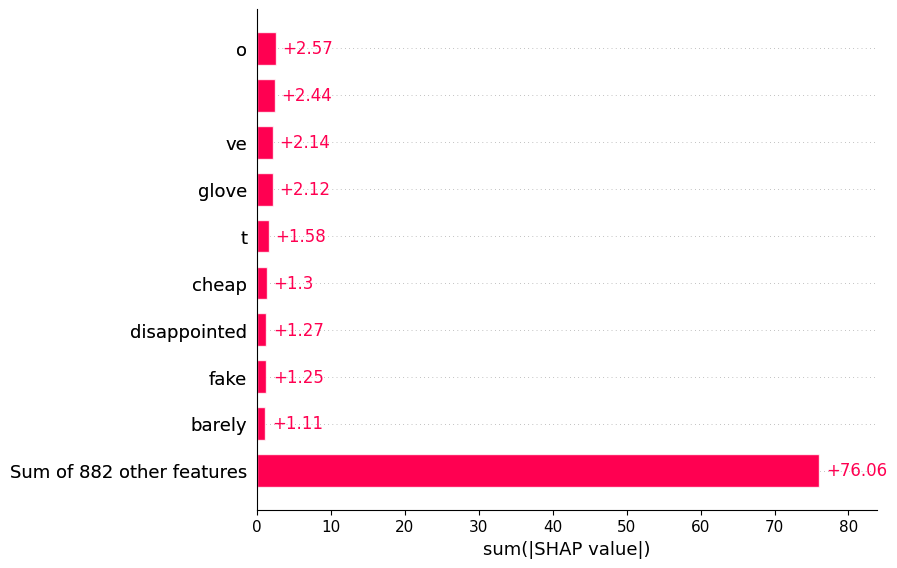

In [ ]:
shap.plots.bar(shap_values.abs.sum(0))

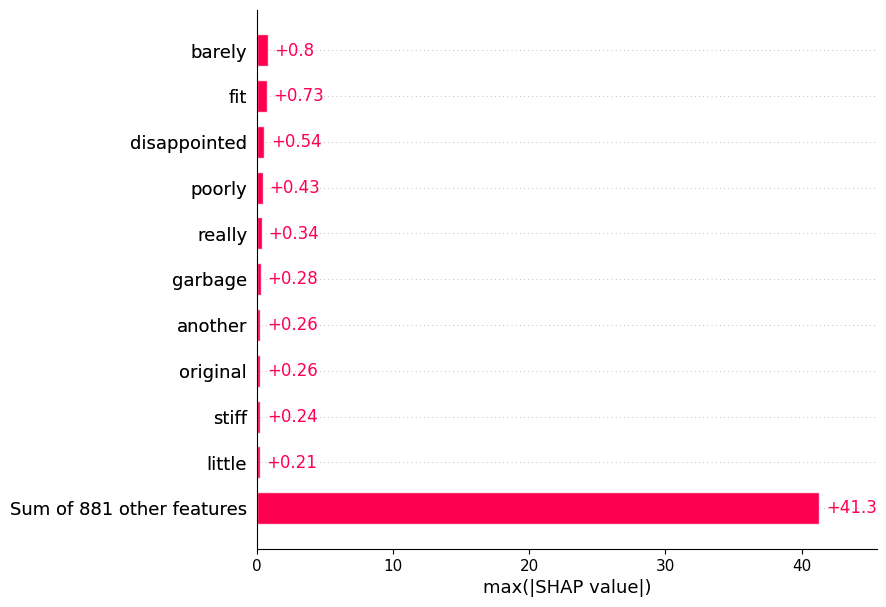

In [ ]:
shap.plots.bar(shap_values.abs.max(0), max_display=11)

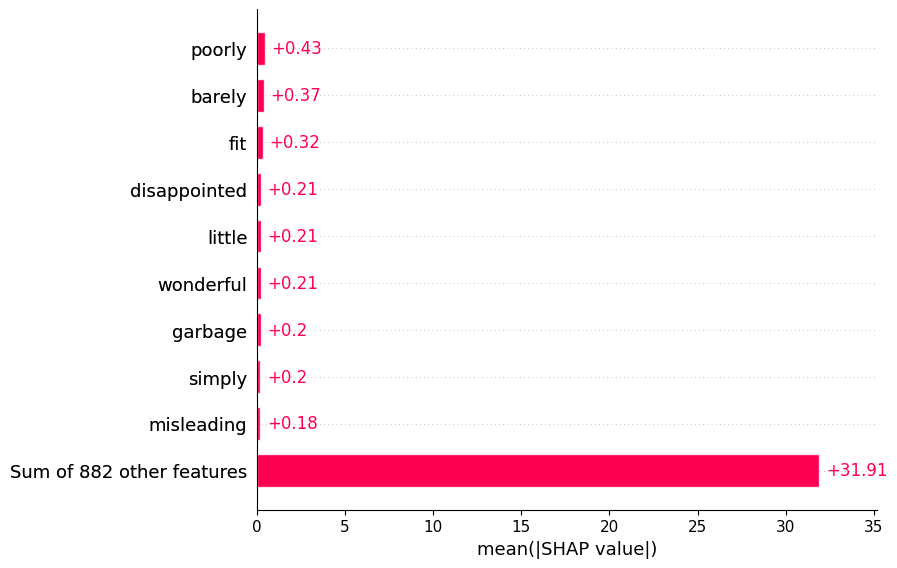

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
shap.plots.text(shap_values[46])

Reviews: 4, 13, **26**, 27, **34**, 39, **46, 47**

# **UGG Boots**

In [ ]:
# Reading the dataset.
ugg = pd.read_csv('UGG_label.csv')
ugg.head()

,review_date,handle,rating,helpfulness_rating,Olga label,Amer label,Jason label,Justin label,Final label,review
0,6-Mar-23,Bereniz Flores,5,NaN,0,0,0,0,0,I love my boots especially since I was able to...
1,23-Feb-23,JESSICA Zerlotta,5,2,0,0,0,0,0,Southern California girl here…. I want to use ...
2,2-Mar-23,whiplash,5,One,0,0,0,0,0,Wife is 5’7 and has a muscular calf and likes ...
3,2-Mar-23,Gia,5,NaN,0,0,0,0,0,These are good quality. The texture is really ...
4,27-Feb-23,Rollin Olson,5,NaN,0,0,0,0,0,My wife is enjoying these


In [ ]:
ugg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_date         1101 non-null   object
 1   handle              1101 non-null   object
 2   rating              1101 non-null   int64 
 3   helpfulness_rating  204 non-null    object
 4   Olga label          1101 non-null   int64 
 5   Amer label          1101 non-null   int64 
 6   Jason label         1101 non-null   int64 
 7   Justin label        1101 non-null   int64 
 8   Final label         1101 non-null   int64 
 9   review              1101 non-null   object
dtypes: int64(6), object(4)
memory usage: 86.1+ KB


In [ ]:
ugg.shape

(1101, 10)

The dataset has 1101 rows and 10 columns. Each row represents a review for a given product.

In [ ]:
# Counting all values in "Final Label" column.
print(ugg['Final label'].value_counts())

0    1038
1      63
Name: Final label, dtype: int64


In [ ]:
# Calculating persantage of values in the 'Final label' column.
print(ugg['Final label'].value_counts(normalize=True).mul(100).round(2))

0    94.28
1     5.72
Name: Final label, dtype: float64


The 'Final label' column has values 0, 1. They represent:
- Not counterfeit product as 0,
- Counterfeit product as 1,

The dataset has:
- Not counterfeit product reviews: 1038 (94.28%)
- Counterfeit product reviews: 63 (5.72%)



In [ ]:
# Computing the Cohen's Kappa score.
rater1 = ugg['Amer label']
rater2 = ugg['Olga label']
rater3 = ugg['Jason label']
rater3 = ugg['Justin label']
taskdata = [[0,str(i),str(rater1[i])] for i in range(0,len(rater1))]+[[1,str(i),str(rater2[i])] for i in range(0,len(rater2))]+[[2,str(i),str(rater3[i])] for i in range(0,len(rater3))]
ratingtask = agreement.AnnotationTask(data = taskdata)

print("kappa " +str(ratingtask.kappa()))
print("fleiss " + str(ratingtask.multi_kappa()))
print("alpha " +str(ratingtask.alpha()))
print("scotts " + str(ratingtask.pi()))

kappa 0.9182318472472875
fleiss 0.9178329593567943
alpha 0.9178552474459334
scotts 0.91783037017381


In [ ]:
# Dropping columns that are not useful.
ugg.drop(columns = ['review_date','handle','helpfulness_rating', 'Amer label', 'Olga label', 'Jason label', 'Justin label'], inplace = True)
ugg.head()

,rating,Final label,review
0,5,0,I love my boots especially since I was able to...
1,5,0,Southern California girl here…. I want to use ...
2,5,0,Wife is 5’7 and has a muscular calf and likes ...
3,5,0,These are good quality. The texture is really ...
4,5,0,My wife is enjoying these


In [ ]:
# 1. Pre-process data as appropriate (10 pts.)
# Applying the function to the column in DataFrame.
ugg['review'] = ugg['review'].apply(review_preprocess)
ugg.head()

,rating,Final label,review
0,5,0,love boots especially since able affirm make p...
1,5,0,southern california girl here… want use boots ...
2,5,0,wife ’ muscular calf likes tight fit style wid...
3,5,0,good quality texture really soft
4,5,0,wife enjoying


In [ ]:
# Splitting dataset into training and testing.
X_u = ugg['review']
y_u = ugg['Final label']

X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_u, y_u, test_size = 0.33, random_state = 101)

In [ ]:
# 2. Build Naive Bayes and a sequential model with sentence embedding (300 dimensions) (10 pts.)
# 3. Assess model performance, pick one metric to compare model performance and explain your metric choice. (10 pts.)
# G-means.
# Listing the models that will be built.
names = ["Naive Bayes", "Logistic Regression", "Decision Tree", "Boosted Tree", "Random Forest", "SVM"]

# Defining the corresponding list of classifiers, setting parameters for each model.
classifiers = [MultinomialNB(),
               LogisticRegression(),
               DecisionTreeClassifier(max_depth = 5),
               AdaBoostClassifier(),
               RandomForestClassifier(max_depth = 5, n_estimators = 10),
               SVC(probability = True),
               ]

# Creating a dictionary to store the optimal thresholds for each model.
thresholds = {}

# Fitting each classifier to the training set, making predictions on the test set,
# evaluating performance, and finding the optimal threshold for each model.
for name, clf in zip(names, classifiers):
    clf_pipe = Pipeline([
        ('tfidf', TfidfVectorizer(max_df = 0.9, max_features = 5000,
                                  min_df = 0.1,
                                  use_idf = True, tokenizer = tokenize_and_stem, ngram_range = (1, 3))),
        (name, clf)
    ])

    clf_pipe.fit(X_train_u, y_train_u)

    pred_prob = clf_pipe.predict_proba(X_test_u)[:, 1]
    fpr, tpr, thresholds_ = roc_curve(y_test_u, pred_prob)

    # Computing the G-mean for each threshold.
    g_mean = []
    for thresh in thresholds_:
        pred = (pred_prob >= thresh).astype(int)
        g_mean.append(geometric_mean_score(y_test_u, pred))

    # Choosing the threshold that maximizes the G-mean.
    optimal_idx = np.argmax(g_mean)
    optimal_threshold = thresholds_[optimal_idx]

    # Storing the optimal threshold in the dictionary.
    thresholds[name] = optimal_threshold

    # Making predictions using the optimal threshold.
    pred = (pred_prob >= optimal_threshold).astype(int)

    roc_auc = roc_auc_score(y_test_u, pred_prob)
    precision, recall, thresholds_pr = precision_recall_curve(y_test_u, pred)
    log_loss_val = log_loss(y_test_u, pred_prob)
    g_mean_val = geometric_mean_score(y_test_u, pred)

    target_names = ['Not counterfeit product', 'Counterfeit product']

    print('\n\n', name, '\n\n')
    print(classification_report(y_test_u, pred, target_names = target_names))
    print('ROC AUC: ', round(roc_auc, 2))
    print('Precision/Recall AUC: ', round(auc(precision, recall), 2))
    print('Optimal threshold: ', round(optimal_threshold, 2))
    print('Log loss: ', round(log_loss_val, 2))
    print('G-mean: ', round(g_mean_val, 2))

    print('\n\n')

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 Naive Bayes 


                         precision    recall  f1-score   support

Not counterfeit product       1.00      0.65      0.78       345
    Counterfeit product       0.13      0.95      0.23        19

               accuracy                           0.66       364
              macro avg       0.56      0.80      0.51       364
           weighted avg       0.95      0.66      0.75       364

ROC AUC:  0.86
Precision/Recall AUC:  0.49
Optimal threshold:  0.06
Log loss:  0.16
G-mean:  0.78





/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 Logistic Regression 


                         precision    recall  f1-score   support

Not counterfeit product       0.98      0.82      0.89       345
    Counterfeit product       0.18      0.74      0.29        19

               accuracy                           0.82       364
              macro avg       0.58      0.78      0.59       364
           weighted avg       0.94      0.82      0.86       364

ROC AUC:  0.87
Precision/Recall AUC:  0.42
Optimal threshold:  0.07
Log loss:  0.16
G-mean:  0.78





/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 Decision Tree 


                         precision    recall  f1-score   support

Not counterfeit product       0.98      0.90      0.94       345
    Counterfeit product       0.26      0.63      0.37        19

               accuracy                           0.89       364
              macro avg       0.62      0.77      0.65       364
           weighted avg       0.94      0.89      0.91       364

ROC AUC:  0.76
Precision/Recall AUC:  0.4
Optimal threshold:  0.2
Log loss:  0.35
G-mean:  0.75





/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 Boosted Tree 


                         precision    recall  f1-score   support

Not counterfeit product       0.99      0.77      0.86       345
    Counterfeit product       0.17      0.84      0.28        19

               accuracy                           0.77       364
              macro avg       0.58      0.81      0.57       364
           weighted avg       0.95      0.77      0.83       364

ROC AUC:  0.84
Precision/Recall AUC:  0.46
Optimal threshold:  0.49
Log loss:  0.52
G-mean:  0.8





/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 Random Forest 


                         precision    recall  f1-score   support

Not counterfeit product       0.99      0.66      0.79       345
    Counterfeit product       0.13      0.89      0.22        19

               accuracy                           0.67       364
              macro avg       0.56      0.78      0.51       364
           weighted avg       0.95      0.67      0.76       364

ROC AUC:  0.86
Precision/Recall AUC:  0.46
Optimal threshold:  0.04
Log loss:  0.16
G-mean:  0.77





/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(




 SVM 


                         precision    recall  f1-score   support

Not counterfeit product       0.99      0.62      0.77       345
    Counterfeit product       0.12      0.89      0.20        19

               accuracy                           0.64       364
              macro avg       0.55      0.76      0.48       364
           weighted avg       0.95      0.64      0.74       364

ROC AUC:  0.79
Precision/Recall AUC:  0.46
Optimal threshold:  0.06
Log loss:  0.2
G-mean:  0.75





In [ ]:
# Builsequential model with sentence embedding (300 dimensions).
# Pre-processing reviews for modeling.
vocab_size = 5000
embedding_dim = 300
max_length = 500
trunc_type ='post'
oov_tok = "<OOV>"

# Tokenization
tokenizer_ugg = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer_ugg.fit_on_texts(X_train_u)

word_index = tokenizer_ugg.word_index
sequences_ugg = tokenizer_ugg.texts_to_sequences(X_train_u)
testing_sequences_ugg = tokenizer_ugg.texts_to_sequences(X_test_u)

# Padding
padded_ugg = pad_sequences(sequences_ugg, maxlen = max_length, truncating = trunc_type)
testing_padded_ugg = pad_sequences(testing_sequences_ugg, maxlen = max_length)

In [ ]:
# Developing a 2-layer (100, 100) fully-connected neural network model using review length 500 and 300-dimension.
# Using activation ='softmax', loss ='categorical_crossentropy'
model_500_300_ugg = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])
model_500_300_ugg.compile(loss ='binary_crossentropy', optimizer ='adam',
                          metrics = [tf.keras.metrics.AUC(name = 'roc_auc')])
model_500_300_ugg.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, 500, 300)          1500000   
                                                                 
 flatten_34 (Flatten)        (None, 150000)            0         
                                                                 
 dense_102 (Dense)           (None, 100)               15000100  
                                                                 
 dense_103 (Dense)           (None, 100)               10100     
                                                                 
 dense_104 (Dense)           (None, 1)                 101       
                                                                 
Total params: 16,510,301
Trainable params: 16,510,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 5)

In [ ]:
# Training the model.
num_epochs = 100
history = model_500_300_ugg.fit(padded_ugg, y_train_u, epochs = num_epochs,
                                validation_data = (testing_padded_ugg, y_test_u), callbacks = [early_stop])

Epoch 1/100
24/24 [==============================] - 3s 76ms/step - loss: 0.3248 - roc_auc: 0.5074 - val_loss: 0.1850 - val_roc_auc: 0.8616
Epoch 2/100
24/24 [==============================] - 2s 67ms/step - loss: 0.2069 - roc_auc: 0.6997 - val_loss: 0.1687 - val_roc_auc: 0.9274
Epoch 3/100
24/24 [==============================] - 2s 66ms/step - loss: 0.1573 - roc_auc: 0.8440 - val_loss: 0.1220 - val_roc_auc: 0.9710
Epoch 4/100
24/24 [==============================] - 2s 65ms/step - loss: 0.0580 - roc_auc: 0.9954 - val_loss: 0.1068 - val_roc_auc: 0.9786
Epoch 5/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0199 - roc_auc: 0.9996 - val_loss: 0.1063 - val_roc_auc: 0.9376
Epoch 6/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0061 - roc_auc: 1.0000 - val_loss: 0.0675 - val_roc_auc: 0.9783
Epoch 7/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0024 - roc_auc: 1.0000 - val_loss: 0.0798 - val_roc_auc: 0.9612
Epoch 8/100
24/24 [=

In [ ]:
# Finding optimal threshold and evaluating the model.
y_pred_proba_u = model_500_300_ugg.predict(testing_padded_ugg)
y_pred_proba_u = y_pred_proba_u[:, 0]
fpr, tpr, thresholds = roc_curve(y_test_u, y_pred_proba_u)
sort_idx = np.argsort(thresholds)
fpr = fpr[sort_idx]
tpr = tpr[sort_idx]
thresholds = thresholds[sort_idx]
gmeans_ker = np.sqrt(tpr * (1-fpr))
gmeans_ker[np.isnan(gmeans_ker)] = 0
optimal_idx = np.argmax(gmeans_ker)
optimal_threshold = thresholds[optimal_idx]

y_pred = (y_pred_proba_u >= optimal_threshold).astype(int)
precision, recall, thresholds_pr = precision_recall_curve(y_test_u, y_pred)

log_loss_val = log_loss(y_test_u, y_pred_proba_u)

print(classification_report(y_test_u, y_pred, target_names = target_names))
print('ROC AUC: ', round(auc(fpr, tpr), 2))
print('Precision/Recall AUC: ', round(auc(precision, recall), 2))
print("Optimal Threshold:", round(optimal_threshold, 5))
print('Log loss: ', round(log_loss_val, 2))

12/12 [==============================] - 0s 6ms/step
                         precision    recall  f1-score   support

Not counterfeit product       0.99      0.97      0.98       345
    Counterfeit product       0.63      0.89      0.74        19

               accuracy                           0.97       364
              macro avg       0.81      0.93      0.86       364
           weighted avg       0.98      0.97      0.97       364

ROC AUC:  0.98
Precision/Recall AUC:  0.71
Optimal Threshold: 0.03446
Log loss:  0.07


Accuracy, Precision, Recall, and F-measure are threshold-dependent metrics. ROC curve and AUC are threshold-independent. G-means were used to find an optimal threshold.
- ROC AUC:
     - Naive Bayes: 0.86
     - Logistic Regression: 0.87
     - Decision Tree: 0.76
     - Boosted Tree: 0.84
     - Random Forest: 0.85
     - SVM: 0.79
     - Keras: 0.98

Keras model has the best performance based on ROC AUC metric of 0.98 and optimal threshold of 0.03478.

Logistic Regression has the second best performance based on ROC AUC metric of 0.87 and optimal threshold of 0.07.

**Feature extraction - Ugg, Bert**

In [ ]:
# Creating a list for counterfeit product.
counterfeit_reviews_u = ugg[ugg['Final label'] == 1]['review'].tolist()
counterfeit_reviews_u[:3]

['ive waited waited forever shoes come open box uggbox boots clear plastic bag put different boot sizes one big tight purchased several times site brand particularly ugg one wear time disappointedi going take back one much bigger weird hard walk says size didnt even get box anything usually come nice ugg box store cannot believe much bigger one disappointed try reorder need',
 'see number reviews claim received fakes made china thats false assumption uggs made factories china cambodia phillippines vietnam receive pair claims made australia new zealand thats actually sign counterfeit labels security stripe sewn inside left boot right boot label still contains sizing country origin information original review professor supply chain management naturally aware proliferation counterfeit goods sold online especially among amazon marketplace sellers came buying pair uggs stuck buying directly amazon impression amazon buys directly manufacturers boy disappointed right box exterior boots feel n

In [ ]:
# Checking total number of negative reviews in the list.
print(len(counterfeit_reviews_u))

63


In [ ]:
# Loading a BERT sentiment analysis model.(Runtime CPU)
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
model = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
).cuda()

# Defining a prediction function.
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

In [ ]:
# Building an explainer using a token masker.
explainer = shap.Explainer(f, tokenizer)

In [ ]:
# Explaining the model's predictions on 'Ugg' dataset.
shap_values = explainer(counterfeit_reviews_u, fixed_context = 1)

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer:   6%|▋         | 4/63 [00:16<01:56,  1.97s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

Partition explainer: 64it [01:20,  1.30s/it]


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


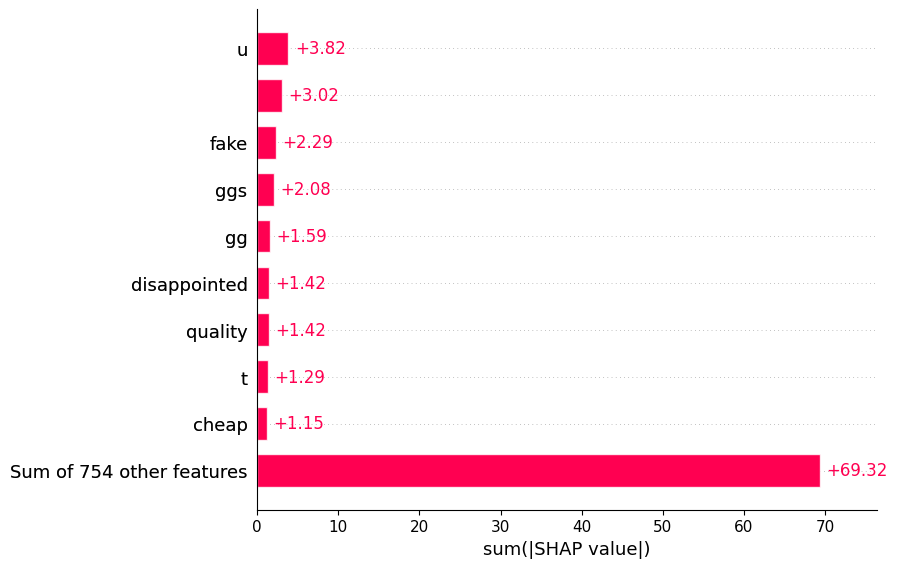

In [ ]:
shap.plots.bar(shap_values.abs.sum(0))

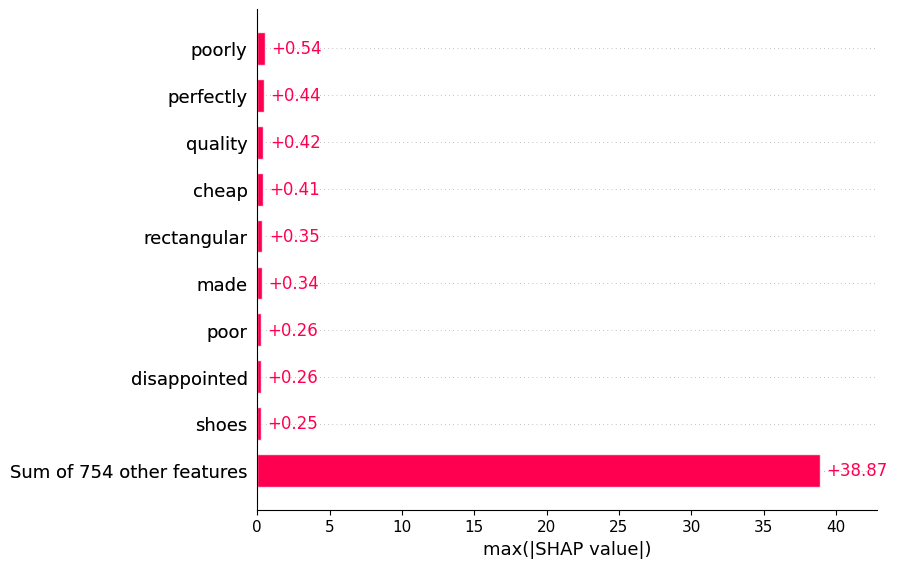

In [ ]:
shap.plots.bar(shap_values.abs.max(0), max_display = 10)

In [ ]:
shap.plots.text(shap_values[58])

Reviews: **0**, 8, 21, 37, 41, **47**, 51, **54**, **55**, **58**, **62**.

# **Transfer learning.**

**Ove - train, Ugg - test**

In [ ]:
# Building sequential model with sentence embedding (300 dimensions).
# Pre-processing reviews for modeling.
vocab_size = 5000
embedding_dim = 300
max_length = 500
trunc_type ='post'
oov_tok = "<OOV>"

# Tokenization Ove
tokenizer_o = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer_o.fit_on_texts(X_o)

word_index_o = tokenizer_o.word_index
sequences_o = tokenizer_o.texts_to_sequences(X_o)

# Padding Ove
padded_o = pad_sequences(sequences_o, maxlen = max_length, truncating = trunc_type)

# Tokenization Ugg
tokenizer_u = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer_u.fit_on_texts(X_u)

word_index_u = tokenizer_u.word_index
sequences_u = tokenizer_u.texts_to_sequences(X_u)

# Padding Ugg
padded_u = pad_sequences(sequences_u, maxlen = max_length, truncating = trunc_type)

In [ ]:
# Developing a 2-layer (100, 100) fully-connected neural network model using review length 500 and 300-dimension.
# Using activation ='softmax', loss ='categorical_crossentropy'
model_1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])
model_1.compile(loss ='binary_crossentropy', optimizer ='adam',
                          metrics = [tf.keras.metrics.AUC(name = 'roc_auc')])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 300)          1500000   
                                                                 
 flatten_2 (Flatten)         (None, 150000)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               15000100  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 16,510,301
Trainable params: 16,510,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 5)

In [ ]:
# Training the model.
num_epochs = 100
history = model_1.fit(padded_o, y_o, epochs = num_epochs,
                                validation_data = (padded_u, y_u), callbacks = [early_stop])

Epoch 1/100
27/27 [==============================] - 7s 193ms/step - loss: 0.2931 - roc_auc: 0.5801 - val_loss: 0.2010 - val_roc_auc: 0.8056
Epoch 2/100
27/27 [==============================] - 6s 220ms/step - loss: 0.1385 - roc_auc: 0.8776 - val_loss: 0.2119 - val_roc_auc: 0.7754
Epoch 3/100
27/27 [==============================] - 4s 144ms/step - loss: 0.0576 - roc_auc: 0.9848 - val_loss: 0.2281 - val_roc_auc: 0.6263
Epoch 4/100
27/27 [==============================] - 3s 106ms/step - loss: 0.0239 - roc_auc: 0.9977 - val_loss: 0.3437 - val_roc_auc: 0.5163
Epoch 5/100
27/27 [==============================] - 3s 110ms/step - loss: 0.0086 - roc_auc: 0.9999 - val_loss: 0.4363 - val_roc_auc: 0.4817
Epoch 6/100
27/27 [==============================] - 4s 156ms/step - loss: 0.0046 - roc_auc: 1.0000 - val_loss: 0.3439 - val_roc_auc: 0.3971
Epoch 6: early stopping


In [ ]:
# Finding optimal threshold and evaluating the model.
y_pred_proba_tl = model_1.predict(padded_u)
y_pred_proba_tl = y_pred_proba_tl[:, 0]

fpr, tpr, thresholds = roc_curve(y_u, y_pred_proba_tl)
sort_idx = np.argsort(thresholds)
fpr = fpr[sort_idx]
tpr = tpr[sort_idx]
thresholds = thresholds[sort_idx]

gmeans_ker = np.sqrt(tpr * (1-fpr))
gmeans_ker[np.isnan(gmeans_ker)] = 0

optimal_idx = np.argmax(gmeans_ker)
optimal_threshold = thresholds[optimal_idx]

y_pred = (y_pred_proba_tl <= optimal_threshold).astype(int)

roc_auc = roc_auc_score(y_u, y_pred_proba_tl)

log_loss_val = log_loss(y_u, y_pred_proba_tl)

target_names = ['Not counterfeit product', 'Counterfeit product']

print(classification_report(y_u, y_pred, target_names = target_names))
print('ROC AUC: ', round(roc_auc, 2))
print("Optimal Threshold:", round(optimal_threshold, 20))
print('Log loss: ', round(log_loss_val, 2))

35/35 [==============================] - 0s 2ms/step
                         precision    recall  f1-score   support

Not counterfeit product       0.96      0.32      0.48      1038
    Counterfeit product       0.06      0.76      0.12        63

               accuracy                           0.35      1101
              macro avg       0.51      0.54      0.30      1101
           weighted avg       0.91      0.35      0.46      1101

ROC AUC:  0.37
Optimal Threshold: 0.020027509
Log loss:  0.34


**Ugg - train, Ove - test**

In [ ]:
# Developing a 2-layer (100, 100) fully-connected neural network model using review length 500 and 300-dimension.
# Using activation ='softmax', loss ='categorical_crossentropy'
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(100, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])
model_2.compile(loss ='binary_crossentropy', optimizer ='adam',
                          metrics = [tf.keras.metrics.AUC(name = 'roc_auc')])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 300)          1500000   
                                                                 
 flatten_3 (Flatten)         (None, 150000)            0         
                                                                 
 dense_9 (Dense)             (None, 100)               15000100  
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 16,510,301
Trainable params: 16,510,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 5)

In [ ]:
# Training the model.
num_epochs = 100
history = model_1.fit(padded_u, y_u, epochs = num_epochs,
                                validation_data = (padded_o, y_o), callbacks = [early_stop])

Epoch 1/100
35/35 [==============================] - 5s 135ms/step - loss: 0.2867 - roc_auc: 0.5183 - val_loss: 0.0670 - val_roc_auc: 1.0000
Epoch 2/100
35/35 [==============================] - 3s 89ms/step - loss: 0.0758 - roc_auc: 0.9919 - val_loss: 0.0168 - val_roc_auc: 1.0000
Epoch 3/100
35/35 [==============================] - 3s 94ms/step - loss: 0.0163 - roc_auc: 1.0000 - val_loss: 0.0034 - val_roc_auc: 1.0000
Epoch 4/100
35/35 [==============================] - 3s 85ms/step - loss: 0.0041 - roc_auc: 1.0000 - val_loss: 0.0059 - val_roc_auc: 1.0000
Epoch 5/100
35/35 [==============================] - 3s 69ms/step - loss: 0.0017 - roc_auc: 1.0000 - val_loss: 0.0032 - val_roc_auc: 1.0000
Epoch 6/100
35/35 [==============================] - 2s 57ms/step - loss: 9.1590e-04 - roc_auc: 1.0000 - val_loss: 0.0021 - val_roc_auc: 1.0000
Epoch 7/100
35/35 [==============================] - 2s 51ms/step - loss: 6.0658e-04 - roc_auc: 1.0000 - val_loss: 0.0021 - val_roc_auc: 1.0000
Epoch 8/100

In [ ]:
# Finding optimal threshold and evaluating the model.
y_pred_proba_tl_2 = model_2.predict(padded_o)
y_pred_proba_tl_2 = y_pred_proba_tl_2[:, 0]

fpr, tpr, thresholds = roc_curve(y_o, y_pred_proba_tl_2)
sort_idx = np.argsort(thresholds)
fpr = fpr[sort_idx]
tpr = tpr[sort_idx]
thresholds = thresholds[sort_idx]

gmeans_ker = np.sqrt(tpr * (1-fpr))
gmeans_ker[np.isnan(gmeans_ker)] = 0

optimal_idx = np.argmax(gmeans_ker)
optimal_threshold = thresholds[optimal_idx]

y_pred = (y_pred_proba_tl_2 >= optimal_threshold).astype(int)

roc_auc = roc_auc_score(y_o, y_pred_proba_tl_2)

log_loss_val = log_loss(y_o, y_pred_proba_tl_2)

target_names = ['Not counterfeit product', 'Counterfeit product']

print(classification_report(y_o, y_pred, target_names = target_names))
print('ROC AUC: ', round(roc_auc, 2))
print("Optimal Threshold:", round(optimal_threshold, 10))
print('Log loss: ', round(log_loss_val, 2))

27/27 [==============================] - 0s 2ms/step
                         precision    recall  f1-score   support

Not counterfeit product       0.94      0.78      0.86       803
    Counterfeit product       0.05      0.19      0.08        48

               accuracy                           0.75       851
              macro avg       0.50      0.49      0.47       851
           weighted avg       0.89      0.75      0.81       851

ROC AUC:  0.29
Optimal Threshold: 0.507392
Log loss:  0.71
